In [1]:
pwd

'/home/gray/git_folders/DL/emotion_detection'

In [3]:
import os

base_dir = '../dataset/KDEF_and_AKDEF/KDEF/'
datas = []

for i, j, k in os.walk(base_dir):
    
    for img in k:
        name = img.split('.')[0]
        Number = name[:4]
        expression = name[4:6]
        angle = name[6:]
        #print(Number, expression, angle)
        switch_expression = {
            "AF": 0,
            "AN": 1,
            "DI": 2,
            "HA": 3,
            "NE": 4,
            "SA": 5,
            "SU": 6
        }
        switch_angle = {
            "FL": 0,
            "FR": 1,
            "HL": 2,
            "HR": 3,
            "S" : 4
        }
        if(angle == 'FL' or angle=='FR'):
            continue
        data =  Number + '/' + img + ',' + \
                str(switch_expression[expression]) + ',' + \
                str(switch_angle[angle])
        datas.append(data)
        #print(data)

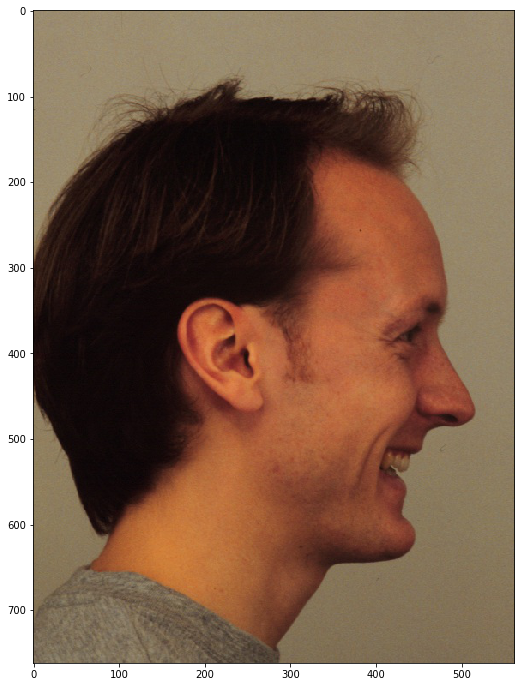

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

mapImg = Image.open('../dataset/KDEF_and_AKDEF/KDEF/'+validation_data[9].split(",")[0])
plt.figure(figsize=(12,12))
plt.imshow(mapImg)

In [4]:
len(datas)

2940

In [6]:
import numpy as np

num_test_samples = 500
num_validation_samples = 300

In [7]:
datas[0]

'BF16/BF16HAHL.JPG,3,2'

In [8]:
def save_file(file_name, rows):
    file = open(file_name, 'w', encoding='utf-8')
    
    for row in rows:
        file.write(row+"\n")
    file.close()

In [9]:
save_file('allDatas.txt', datas)

In [10]:
np.random.shuffle(datas)

validation_data = datas[:num_validation_samples]
test_data = datas[num_validation_samples:num_validation_samples+num_test_samples]
train_data = datas[num_validation_samples+num_test_samples:]

In [11]:
save_file('validation.txt', validation_data)
save_file('test.txt', test_data)
save_file('train.txt', train_data)